In [1]:
!python --version

Python 3.10.9


In [1]:
# !pip install pyarrow
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data =pd.read_parquet("data/yellow_tripdata_2022-01.parquet", engine='pyarrow')

In [3]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [4]:
count = 0
cols = []
for columns in data.columns:
    count += 1
    cols.append(columns)
print(len(cols))
print(count)
# Read the data for January. How many columns are there? 19

19
19


In [5]:
tpep_pickup_datetime = pd.to_datetime(data.tpep_pickup_datetime)
tpep_dropoff_datetime = pd.to_datetime(data.tpep_dropoff_datetime)

In [6]:
# data[data.trip_type == 2]
data["duration"] = data["tpep_dropoff_datetime"]- data["tpep_pickup_datetime"]

# data[]

In [7]:
data["duration"] = data["duration"].apply(lambda td: td.total_seconds()/60)

In [8]:
# td = data.duration.iloc[0]
# td.total_seconds()/60
# What's the standard deviation of the trips duration in January? 46.45
data["duration"].std()

46.44530513776499

In [9]:
data["duration"].nlargest(n=5)

221844     8513.183333
2025707    7890.833333
2445362    7871.633333
1558881    4284.066667
2177646    4019.300000
Name: duration, dtype: float64

In [10]:
data["duration"].nsmallest(n=5)

1809900   -3442.400000
2431501    -120.950000
2428267      -0.983333
2410019      -0.966667
2415417      -0.966667
Name: duration, dtype: float64

/tmp/ipykernel_5413/3706879871.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.duration)


<Axes: xlabel='duration', ylabel='Density'>

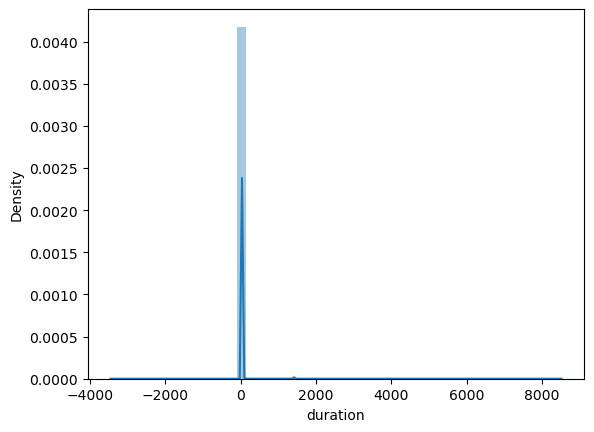

In [11]:
sns.distplot(data.duration)

In [14]:
data["duration"].describe(percentiles=[0.95, 0.98, 0.99])

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
50%      1.018333e+01
95%      3.193333e+01
98%      4.215000e+01
99%      5.085000e+01
max      8.513183e+03
Name: duration, dtype: float64

In [16]:
# What fraction of the records left after you dropped the outliers? 98%
((data["duration"] >= 1) & (data["duration"] <= 60)).mean()

0.9827547930522406

In [18]:
data  = data[(data["duration"] >= 1) & (data["duration"] <= 60)]

In [19]:
data


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN,5.966667
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN,10.650000
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN,11.000000
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN,12.050000


In [24]:
categorical = ["PULocationID", "DOLocationID"]
numerical = ['trip_distance']

In [26]:
data[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [27]:
data[categorical] = data[categorical].astype(str)

In [36]:
data[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [ ]:
data["PULocationID"].unique()


In [45]:
train_dicts = data[categorical].to_dict(orient='records')

In [83]:
len(train_dicts)

2421440

In [46]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()
x_train = dv.fit_transform(train_dicts)

In [47]:
x_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

In [58]:
# What's the dimensionality of this matrix (number of columns)? 515
print(len(dv.feature_names_))

515


In [51]:
target = 'duration'
y_train = data[target].values

In [53]:
y_train

array([17.81666667,  8.4       ,  8.96666667, ..., 11.        ,
       12.05      , 27.        ])

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(x_train)

/tmp/ipykernel_5413/763084093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predictions")
/tmp/ipykernel_5413/763084093.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label="Actuals")


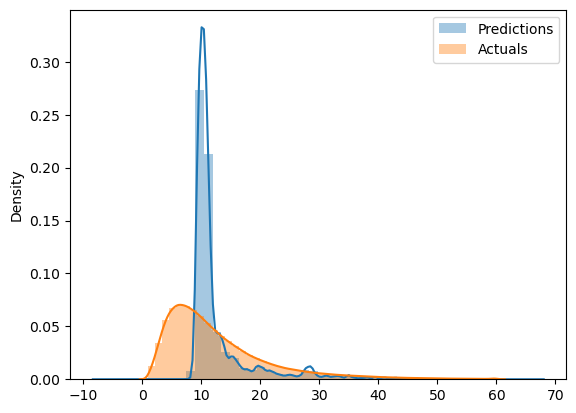

In [62]:
sns.distplot(y_pred, label="Predictions")
sns.distplot(y_train, label="Actuals")

plt.legend()

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred, squared=False)
# What's the RMSE on train? 6.99

6.986190845634642

In [66]:
data = pd.read_parquet("data/yellow_tripdata_2022-02.parquet", engine='pyarrow')

In [67]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25


In [69]:
data["duration"] = data["tpep_dropoff_datetime"]- data["tpep_pickup_datetime"]

data["duration"] = data["duration"].apply(lambda td: td.total_seconds()/60)

In [70]:
data  = data[(data["duration"] >= 1) & (data["duration"] <= 60)]

In [78]:
categorical = ["PULocationID", "DOLocationID"]
data[categorical] = data[categorical].astype(str)
test_dicts = data[categorical].to_dict(orient='records')
x_test = dv.transform(test_dicts)


/tmp/ipykernel_5413/873998534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical] = data[categorical].astype(str)


In [79]:
print(len(dv.feature_names_))

514


In [80]:
target = 'duration'
y_test = data[target].values

In [81]:
lr.predict(x_test)

ValueError: X has 514 features, but LinearRegression is expecting 515 features as input.